In [29]:
import pandas as pd
import os
from utils.ml_utils import PreprocessingUtils, GBEmissionsPredictionPipeline
from utils.eda_utils import EDAUtils, DataCleaningUtils
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
SCRIPT_DIR_PATH = os.getcwd()
ROOT_DIR_PATH = os.path.dirname(SCRIPT_DIR_PATH)
DATA_DIR_PATH = os.path.join(ROOT_DIR_PATH, "data")
MAPPING_DIR_PATH = os.path.join(DATA_DIR_PATH, "mapping")
PREDICTORS_DIR_PATH = os.path.join(DATA_DIR_PATH, "predictors")
SSP_DIR_PATH = os.path.join(DATA_DIR_PATH, "ssp")
SIMULATION_DIR_PATH = os.path.join(SSP_DIR_PATH, "sisepuede_run_2025-01-14T17;04;06.975301_output_database")
TRAINING_DIR_PATH = os.path.join(DATA_DIR_PATH, "training")

In [32]:
TRAINING_DATA_PATH = os.path.join(TRAINING_DIR_PATH, "training_data.csv")
training_df = pd.read_csv(TRAINING_DATA_PATH)
training_df = training_df.drop(columns=["primary_id", "future_id"])
training_df.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,total_emissions_last_five_years
0,0.952436,0.360397,0.202990,0.995748,0.369859,0.919920,0.478450,0.445798,0.490988,0.510280,...,0.873715,0.289038,0.996557,0.053597,0.175103,0.379422,0.438093,0.149362,0.869757,670.507643
1,0.304955,0.204875,0.540658,0.800192,0.206396,0.777352,0.805727,0.536048,0.779857,0.623335,...,0.967765,0.536533,0.385371,0.246165,0.101025,0.717013,0.368791,0.774941,0.483352,604.450538
2,0.609262,0.366443,0.601808,0.916668,0.386475,0.181162,0.138910,0.768925,0.884425,0.232722,...,0.080983,0.533412,0.601590,0.122444,0.653845,0.216259,0.714853,0.881270,0.581230,475.708631
3,0.815313,0.487444,0.323954,0.634299,0.064625,0.926815,0.633805,0.439346,0.027114,0.532020,...,0.916428,0.264120,0.938985,0.592915,0.564895,0.027725,0.138890,0.820709,0.250616,758.004335
4,0.973878,0.842718,0.884382,0.483039,0.455502,0.003343,0.571994,0.108021,0.346714,0.892123,...,0.819569,0.430582,0.492564,0.432240,0.662820,0.179231,0.631375,0.395960,0.661637,600.771431


In [33]:
#add sufix group_  to columns except total_emissions_last_five_years to
training_df.columns = ["group_" + col if col != "total_emissions_last_five_years" else col for col in training_df.columns] 
training_df.head()

,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,...,group_39,group_40,group_41,group_42,group_43,group_44,group_45,group_46,group_47,total_emissions_last_five_years
0,0.952436,0.360397,0.202990,0.995748,0.369859,0.919920,0.478450,0.445798,0.490988,0.510280,...,0.873715,0.289038,0.996557,0.053597,0.175103,0.379422,0.438093,0.149362,0.869757,670.507643
1,0.304955,0.204875,0.540658,0.800192,0.206396,0.777352,0.805727,0.536048,0.779857,0.623335,...,0.967765,0.536533,0.385371,0.246165,0.101025,0.717013,0.368791,0.774941,0.483352,604.450538
2,0.609262,0.366443,0.601808,0.916668,0.386475,0.181162,0.138910,0.768925,0.884425,0.232722,...,0.080983,0.533412,0.601590,0.122444,0.653845,0.216259,0.714853,0.881270,0.581230,475.708631
3,0.815313,0.487444,0.323954,0.634299,0.064625,0.926815,0.633805,0.439346,0.027114,0.532020,...,0.916428,0.264120,0.938985,0.592915,0.564895,0.027725,0.138890,0.820709,0.250616,758.004335
4,0.973878,0.842718,0.884382,0.483039,0.455502,0.003343,0.571994,0.108021,0.346714,0.892123,...,0.819569,0.430582,0.492564,0.432240,0.662820,0.179231,0.631375,0.395960,0.661637,600.771431


In [34]:
# Set some parameters
use_pca = False

## EDA

In [35]:
edau = EDAUtils()

In [36]:
training_df["total_emissions_last_five_years"].describe()

count    1.000000e+03
mean     7.690960e+05
std      1.071674e+07
min      3.616263e+02
25%      6.362033e+02
50%      7.210529e+02
75%      7.955229e+02
max      2.268719e+08
Name: total_emissions_last_five_years, dtype: float64

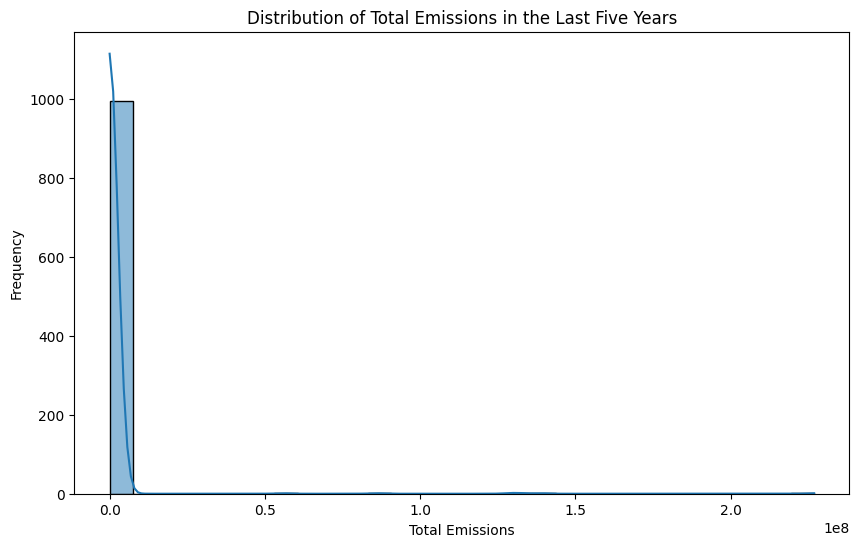

In [37]:
edau.plot_emissions_histogram(training_df)


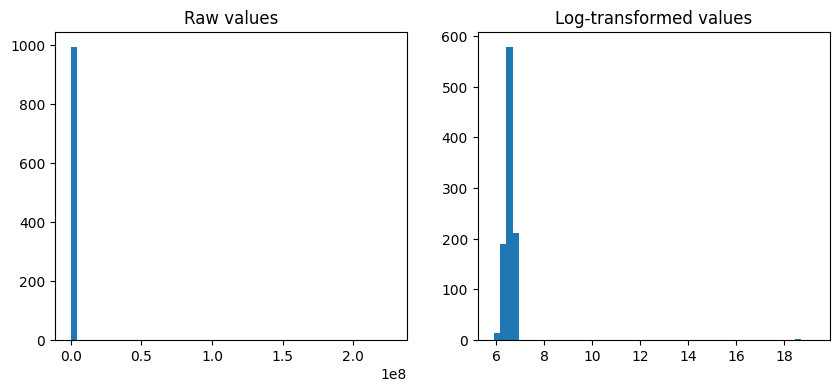

In [38]:
edau.log_transform_comparison_plot(training_df, "total_emissions_last_five_years")

In [39]:
# Correlation with target variable
edau.get_target_var_corr(training_df, "total_emissions_last_five_years")

{'total_emissions_last_five_years': 1.0}

In [40]:
# # Summary table
# summary = edau.numeric_summary(training_df)
# summary

In [41]:
# Find constant / near-constant cols
const_cols = edau.find_constant_columns(training_df)
near_const_cols = edau.find_near_constant_columns(training_df, threshold=1e-2)
print("Constant:", const_cols)
print("Near-constant:", near_const_cols)

Constant: []
Near-constant: []


In [42]:
# Outlier inspection
outliers = edau.find_outlier_columns(training_df, z_thresh=3.0)
print("Outlier percentages:", outliers)

Outlier percentages: {'total_emissions_last_five_years': 0.6}


In [43]:
# Plot all histograms (will show a big grid of 80 plots)
# edau.plot_all_histograms(training_df, bins=30, max_cols=5, figsize_per_plot=(3,2))

## Data Cleaning

In [44]:
dcu = DataCleaningUtils()

In [45]:
training_df.shape

(1000, 47)

In [46]:
training_df_cleaned = dcu.remove_outliers(training_df)
print("Shape after removing outliers:", training_df_cleaned.shape)

Shape after removing outliers: (994, 47)


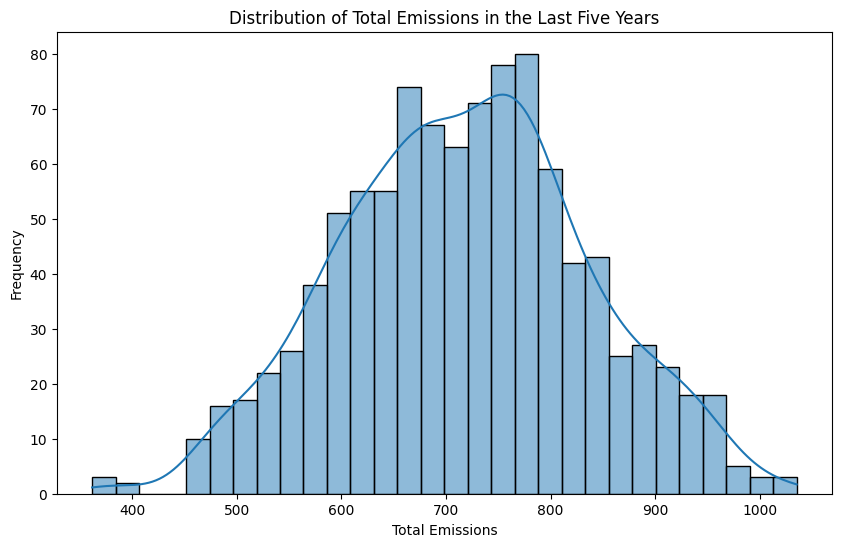

In [47]:
edau.plot_emissions_histogram(training_df_cleaned)

In [48]:
# Get the corr with target variable again
edau.get_target_var_corr(training_df_cleaned, "total_emissions_last_five_years")

{'total_emissions_last_five_years': 1.0,
 'group_34': 0.5631338486127107,
 'group_31': 0.541870251188841,
 'group_17': 0.3296956563349032,
 'group_15': 0.2059307774078895,
 'group_26': 0.1770059749939322}

In [49]:
edau.check_for_multicollinearity(training_df_cleaned, threshold=0.8)

Columns to drop due to multicollinearity (threshold=0.8): set()


[]

## Preprocessing

In [50]:
ppu = PreprocessingUtils()

## ML

In [51]:
epp = GBEmissionsPredictionPipeline(training_df_cleaned, target="total_emissions_last_five_years", test_size=0.2, random_state=42)

In [52]:
epp.df.head()

,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,...,group_39,group_40,group_41,group_42,group_43,group_44,group_45,group_46,group_47,total_emissions_last_five_years
0,0.952436,0.360397,0.202990,0.995748,0.369859,0.919920,0.478450,0.445798,0.490988,0.510280,...,0.873715,0.289038,0.996557,0.053597,0.175103,0.379422,0.438093,0.149362,0.869757,670.507643
1,0.304955,0.204875,0.540658,0.800192,0.206396,0.777352,0.805727,0.536048,0.779857,0.623335,...,0.967765,0.536533,0.385371,0.246165,0.101025,0.717013,0.368791,0.774941,0.483352,604.450538
2,0.609262,0.366443,0.601808,0.916668,0.386475,0.181162,0.138910,0.768925,0.884425,0.232722,...,0.080983,0.533412,0.601590,0.122444,0.653845,0.216259,0.714853,0.881270,0.581230,475.708631
3,0.815313,0.487444,0.323954,0.634299,0.064625,0.926815,0.633805,0.439346,0.027114,0.532020,...,0.916428,0.264120,0.938985,0.592915,0.564895,0.027725,0.138890,0.820709,0.250616,758.004335
4,0.973878,0.842718,0.884382,0.483039,0.455502,0.003343,0.571994,0.108021,0.346714,0.892123,...,0.819569,0.430582,0.492564,0.432240,0.662820,0.179231,0.631375,0.395960,0.661637,600.771431


MAE:  41.6543
RMSE: 53.7913
R²:   0.7679


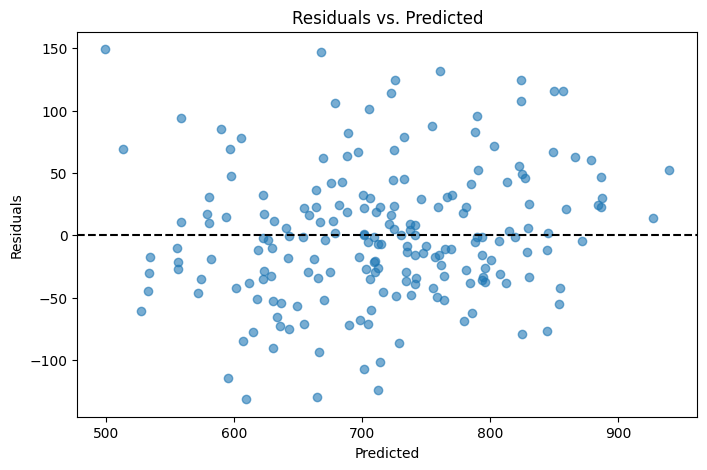

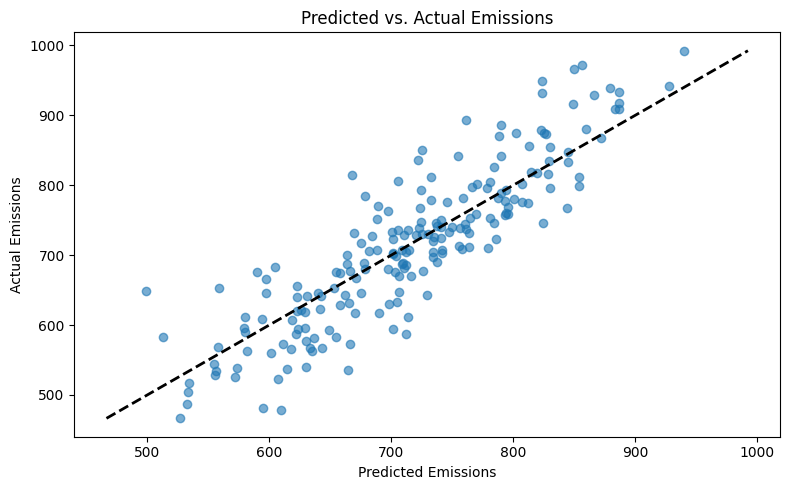

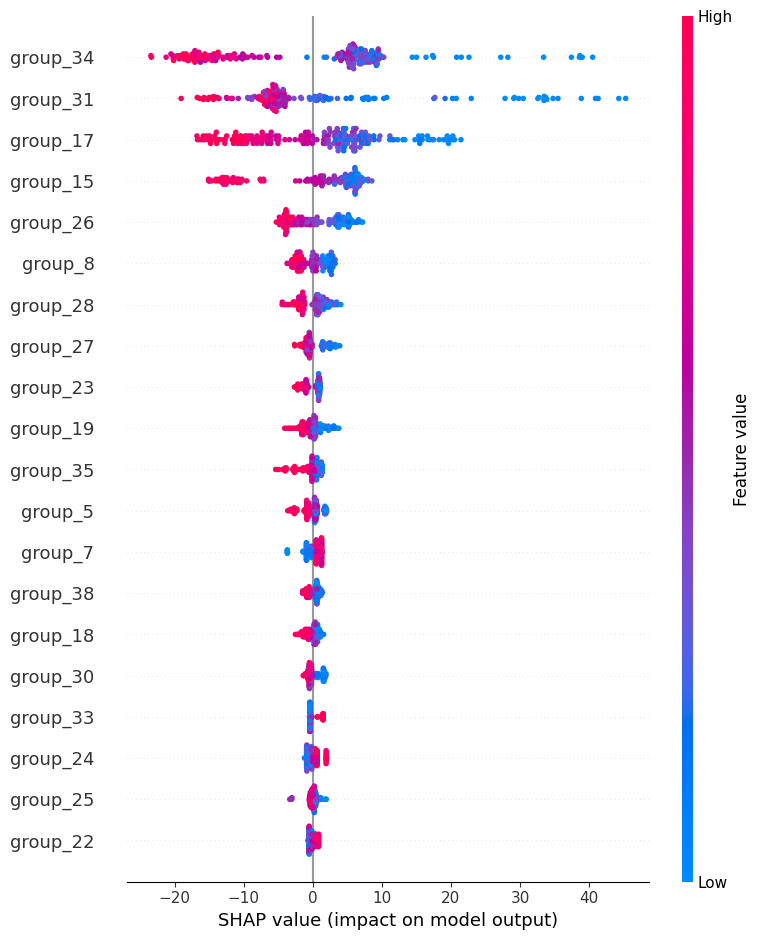


Cross-Validation Results:
test_MAE: Mean=-46.9874, Std=3.7473
test_R2: Mean=0.7358, Std=0.0585
test_RMSE: Mean=-60.4672, Std=5.1191


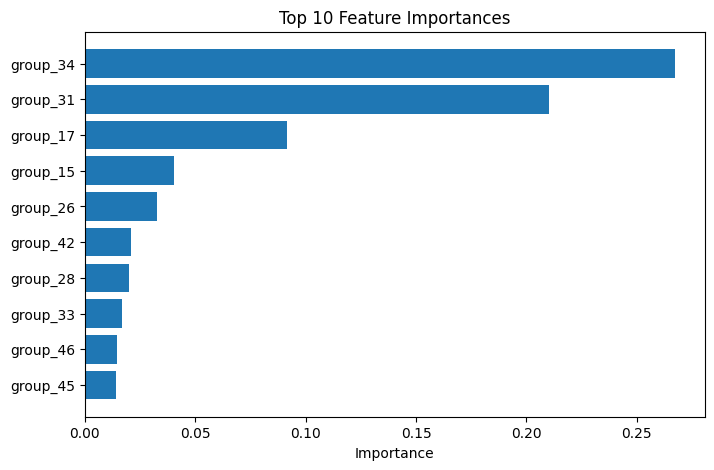

In [54]:
epp.run(tune=False, log_transform=False)